In [70]:
# # 한글 폰트 설치
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf
# # 메뉴 - 런타임 - 세션 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 4s (2,884 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and dire

In [1]:
import pandas as pd
import numpy as np
import random
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from tqdm.auto import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
# 한글 폰트 지정
plt.rc("font", family = "NanumGothic")
# 스타일 서식 적용
plt.style.use('ggplot')

In [4]:
sample = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/sample_submission.csv')
train_df = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/train.csv', encoding='cp949')
test_df = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/test.csv', encoding='cp949')

In [5]:
train_df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


## 파생변수 생성

In [6]:
# Convert 'date_time' column to datetime format
train_df['date_time'] = pd.to_datetime(train_df['date_time'], format='%Y-%m-%d %H')

# Extract month, day, and hour into new columns
train_df['month'] = train_df['date_time'].dt.month.astype(float)
train_df['day'] = train_df['date_time'].dt.day.astype(float)
train_df['time'] = train_df['date_time'].dt.hour.astype(float)

# Display the first few rows to confirm the changes
print(train_df.head())

   num           date_time  전력사용량(kWh)  기온(°C)  풍속(m/s)  습도(%)  강수량(mm)  \
0    1 2020-06-01 00:00:00    8179.056    17.6      2.5   92.0      0.8   
1    1 2020-06-01 01:00:00    8135.640    17.7      2.9   91.0      0.3   
2    1 2020-06-01 02:00:00    8107.128    17.5      3.2   91.0      0.0   
3    1 2020-06-01 03:00:00    8048.808    17.1      3.2   91.0      0.0   
4    1 2020-06-01 04:00:00    8043.624    17.0      3.3   92.0      0.0   

   일조(hr)  비전기냉방설비운영  태양광보유  month  day  time  
0     0.0        0.0    0.0    6.0  1.0   0.0  
1     0.0        0.0    0.0    6.0  1.0   1.0  
2     0.0        0.0    0.0    6.0  1.0   2.0  
3     0.0        0.0    0.0    6.0  1.0   3.0  
4     0.0        0.0    0.0    6.0  1.0   4.0  


In [7]:
train_df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,month,day,time
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,6.0,1.0,0.0
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,6.0,1.0,1.0
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,6.0,1.0,2.0
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,6.0,1.0,3.0
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,6.0,1.0,4.0


## 전력사용량에 대한 acf

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


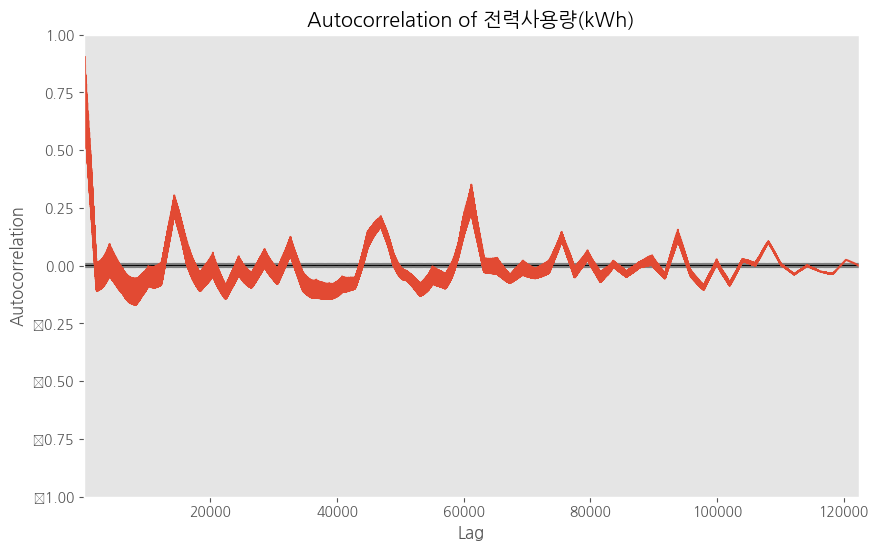

In [8]:
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Convert 'date_time' to datetime format for time series analysis
# train_df['date_time'] = pd.to_datetime(train_df['date_time'], format='%Y-%m-%d %H')

# Set 'date_time' as the index
train_df.set_index('date_time', inplace=True)

# Plot the autocorrelation of the '전력사용량(kWh)' column
plt.figure(figsize=(10, 6))
autocorrelation_plot(train_df['전력사용량(kWh)'])
plt.title('Autocorrelation of 전력사용량(kWh)')
plt.show()

In [9]:
# import statsmodels.api as sm

# # 자기상관성 분석 함수
# def plot_autocorrelation(column_name):
#     plt.figure(figsize=(10, 6))
#     sm.graphics.tsa.plot_acf(train_df[column_name].dropna(), lags=40)
#     plt.title(f'Autocorrelation of {column_name}')
#     plt.show()

# # 분석할 열 목록
# columns_to_analyze = ['전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)', '강수량(mm)', '일조(hr)']

# # 각 열에 대해 자기상관성 분석 수행
# for column in columns_to_analyze:
#     plot_autocorrelation(column)

## 시각화

In [11]:
sample = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/sample_submission.csv')
train = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/train.csv', encoding='cp949')
test = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/test.csv', encoding='cp949')

<Axes: xlabel='전력사용량(kWh)', ylabel='Count'>

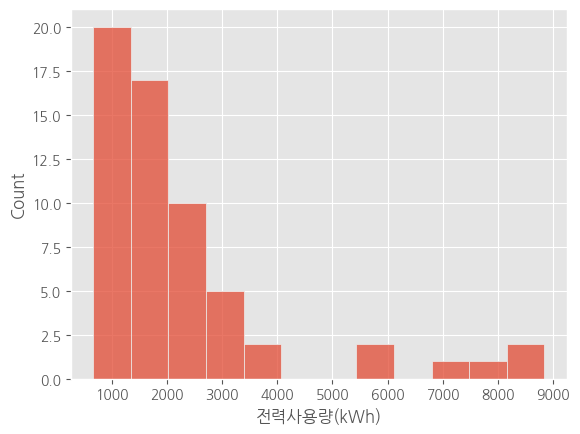

In [12]:
import seaborn as sns
sns.histplot(train.groupby('num')['전력사용량(kWh)'].mean())

In [13]:
train.groupby(['비전기냉방설비운영','태양광보유'])['전력사용량(kWh)'].mean()

비전기냉방설비운영  태양광보유
0.0        0.0      2077.030506
           1.0      1582.298192
1.0        0.0      2101.993590
           1.0      2949.726621
Name: 전력사용량(kWh), dtype: float64

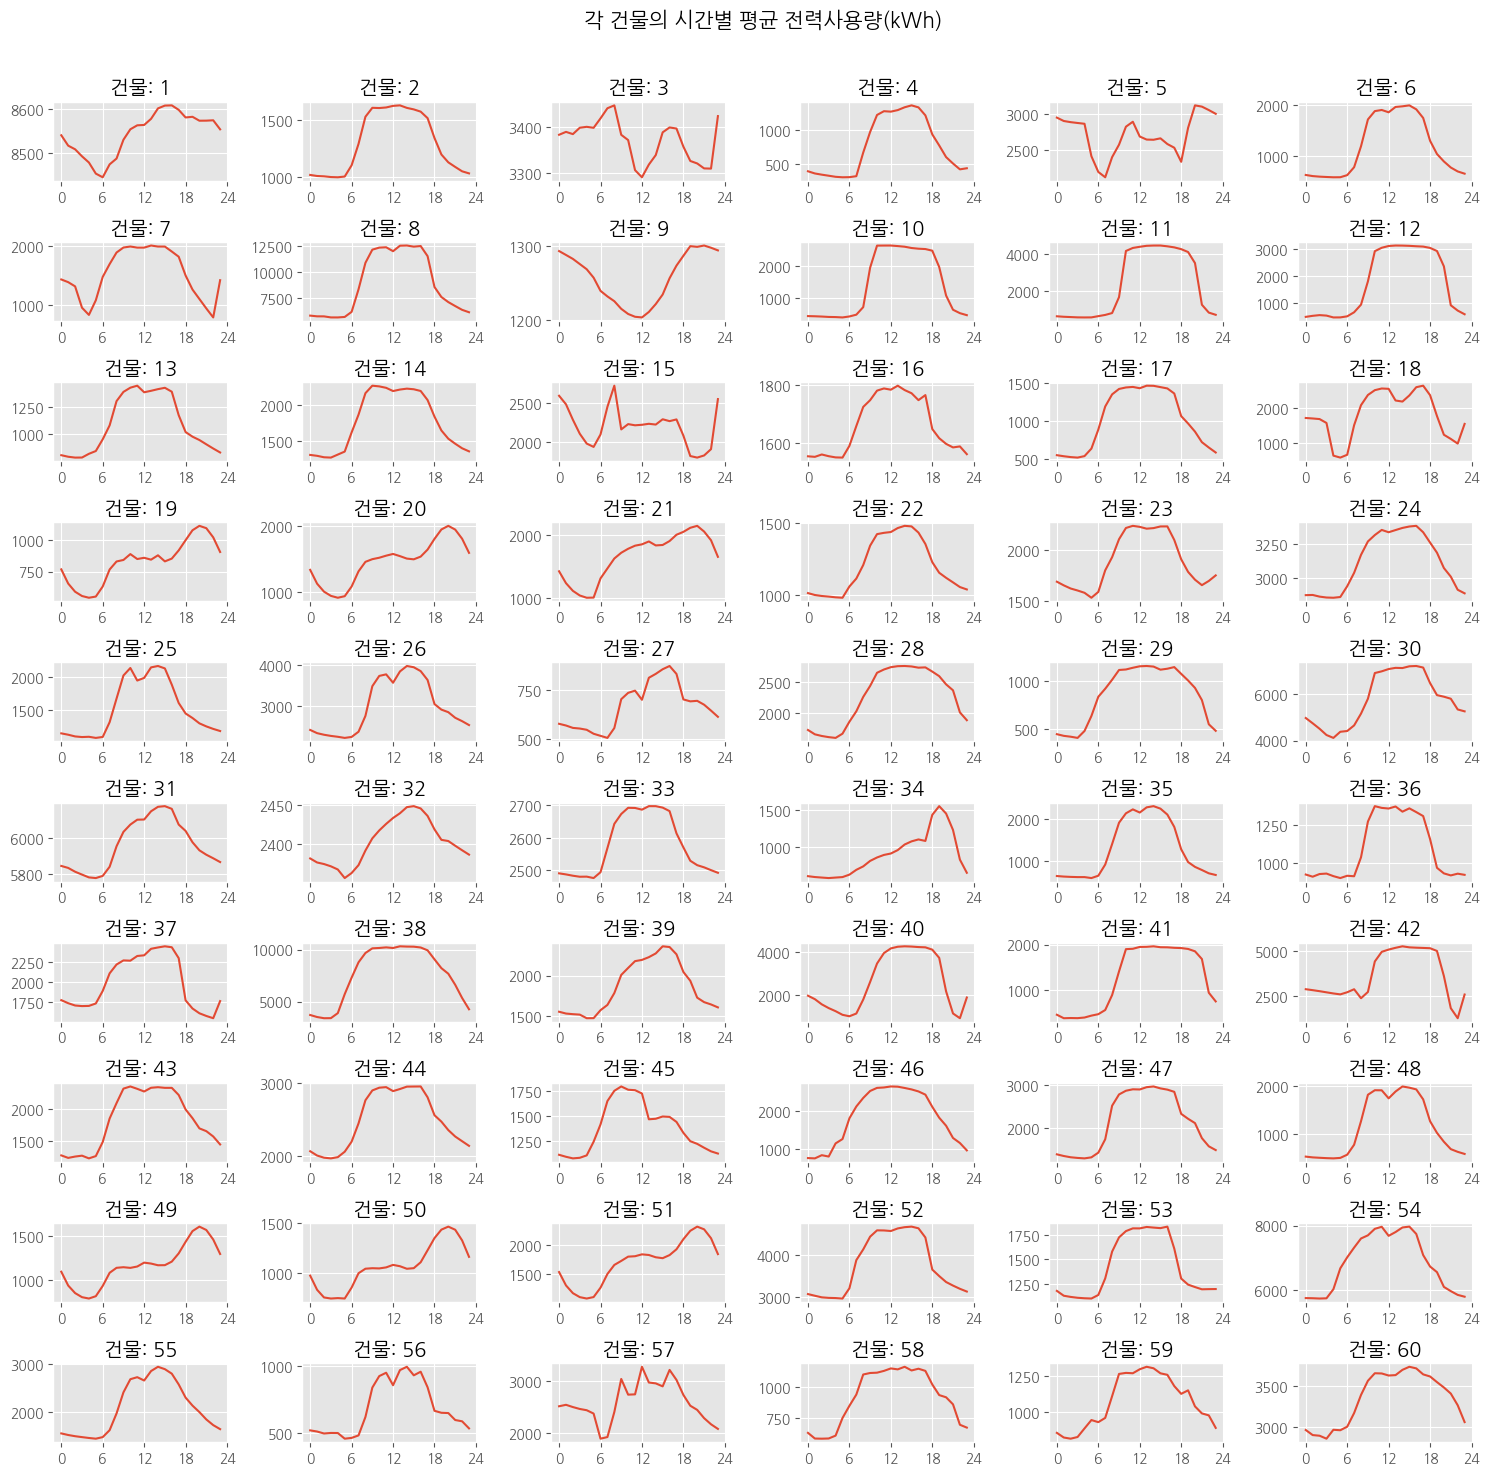

In [14]:
fig = plt.figure(figsize = (15 ,15))
plt.title("각 건물의 시간별 평균 전력사용량(kWh)", fontsize=15, y=1.05)
plt.axis('off')

for num in range(1,61):
    df = train_df[train_df.num==num]
    ax = fig.add_subplot(10,6,num)
    ax.plot(df['time'].unique(), df.groupby('time')['전력사용량(kWh)'].mean())
    ax.set_title(f'건물: {num}')
    ax.set_xticks([0,6,12,18,24])
plt.tight_layout()
plt.show()

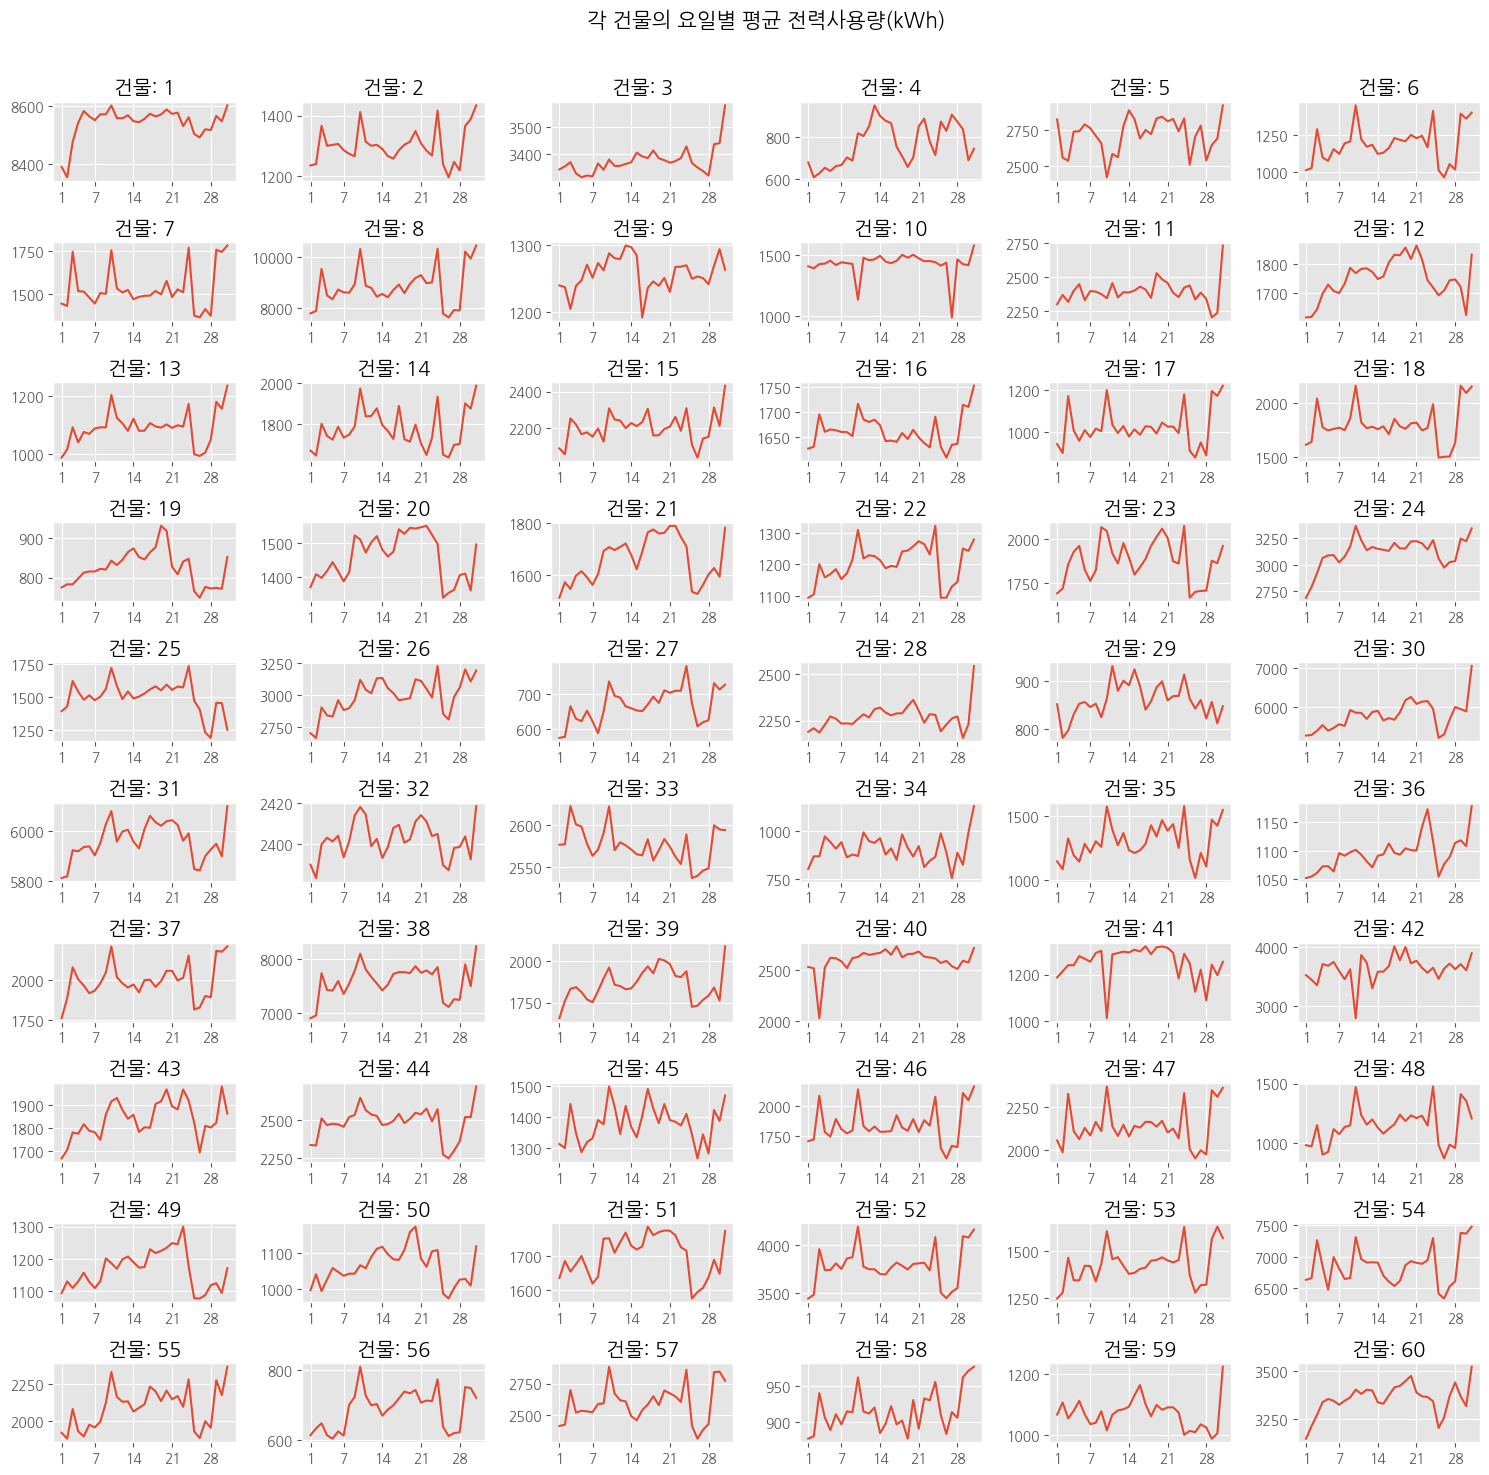

In [15]:
fig = plt.figure(figsize = (15 ,15))
plt.title("각 건물의 요일별 평균 전력사용량(kWh)", fontsize=15, y=1.05)
plt.axis('off')

for num in range(1,61):
    df = train_df[train_df.num==num]
    ax = fig.add_subplot(10,6,num)
    ax.plot(df['day'].unique(), df.groupby('day')['전력사용량(kWh)'].mean())
    ax.set_title(f'건물: {num}')
    ax.set_xticks([1,7,14,21,28])
plt.tight_layout()
plt.show()

## 시계열 분해

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


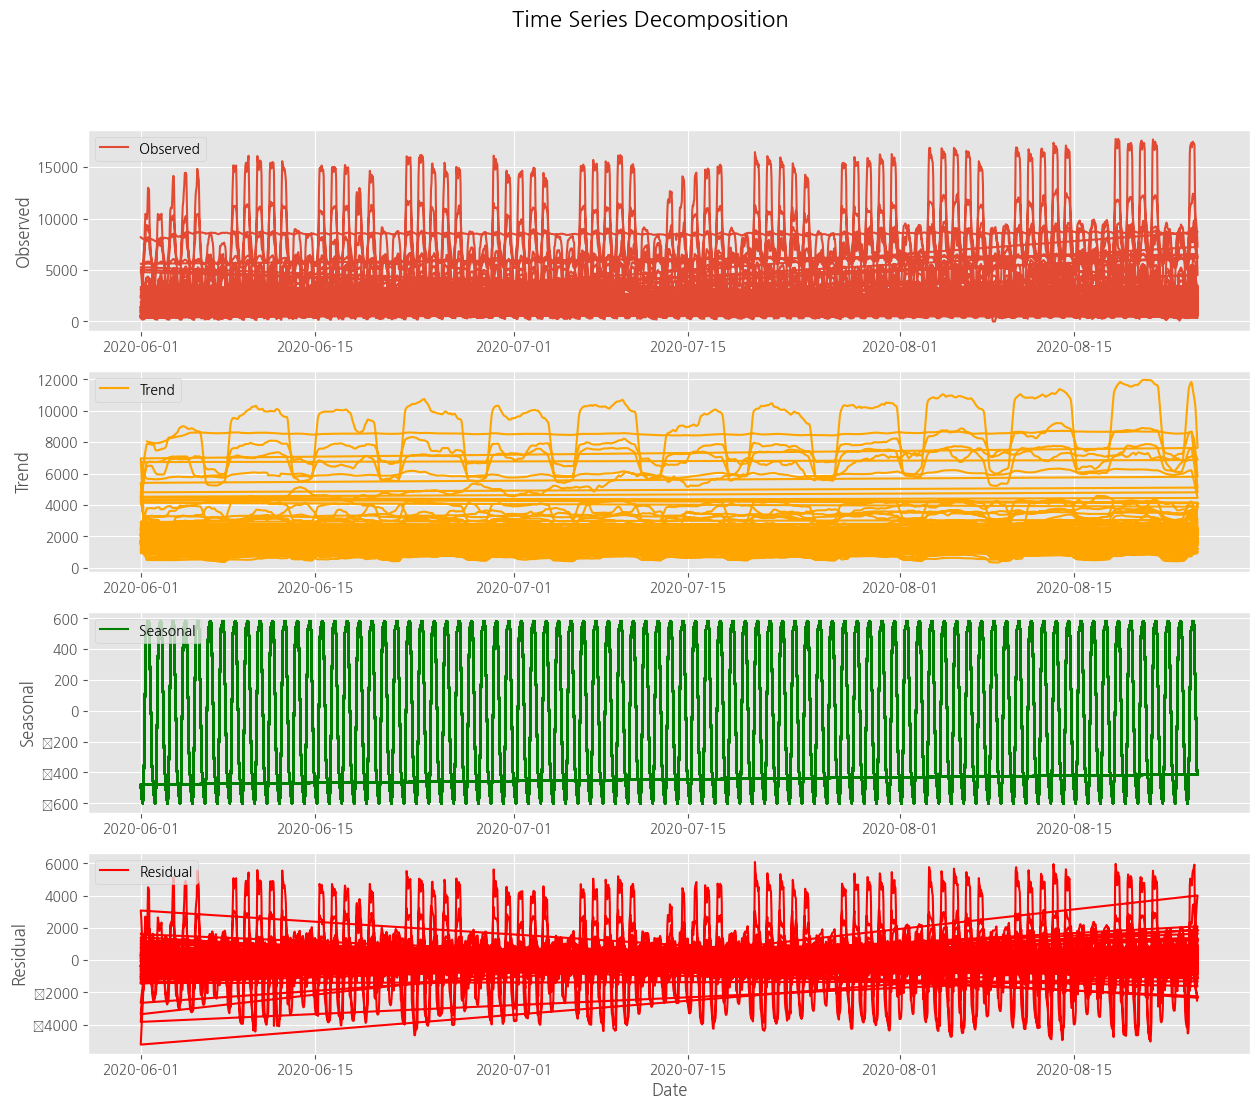

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


# # 결측치 처리
# train_df = train_df.interpolate()

# 시계열 분해 (하루 단위의 계절성을 가정하여 period=24 설정)
decomposition = seasonal_decompose(train_df['전력사용량(kWh)'], model='additive', period=24)

# 분해된 요소들을 플로팅
plt.figure(figsize=(15, 12))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.ylabel('Observed')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.ylabel('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.ylabel('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.ylabel('Residual')

plt.xlabel('Date')
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.show()

In [17]:
train_df.head()

,num,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,month,day,time
date_time,,,,,,,,,,,,
2020-06-01 00:00:00,1,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,6.0,1.0,0.0
2020-06-01 01:00:00,1,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,6.0,1.0,1.0
2020-06-01 02:00:00,1,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,6.0,1.0,2.0
2020-06-01 03:00:00,1,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,6.0,1.0,3.0
2020-06-01 04:00:00,1,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,6.0,1.0,4.0


In [18]:
train_df.reset_index(inplace=True)

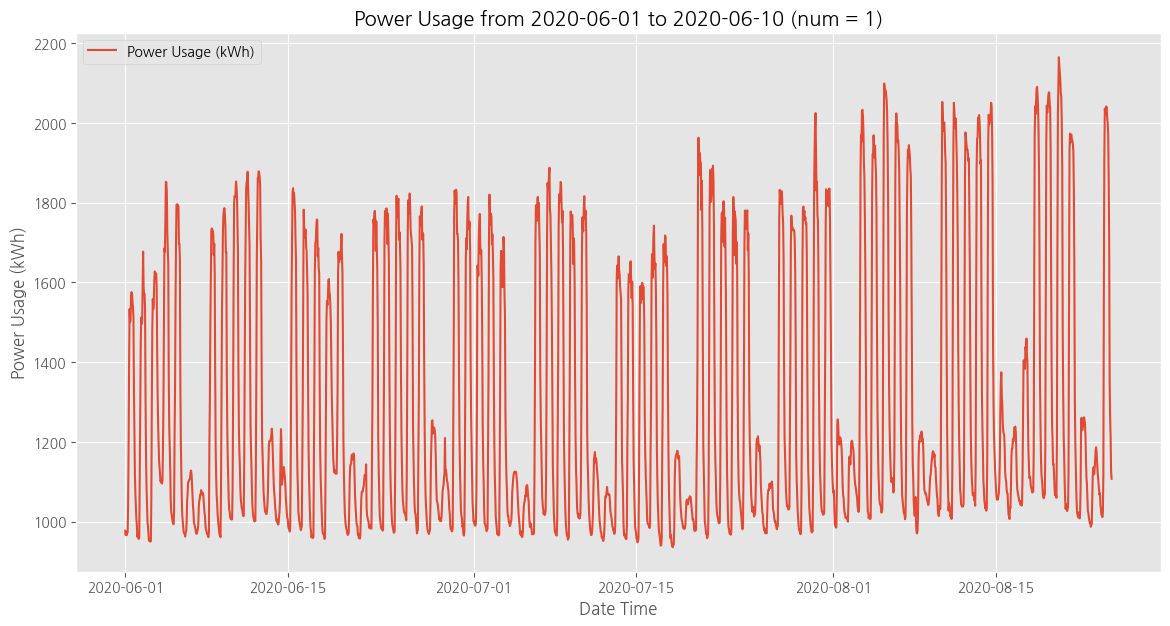

In [19]:

# num == 1인 데이터 필터링 및 특정 기간의 데이터 필터링
num_value = 2
# start_date = '2020-06-01'
# end_date = '2020-06-10'
# filtered_df = train_df[(train_df['num'] == num_value) & (train_df['date_time'] >= start_date) & (train_df['date_time'] <= end_date)]

filtered_df = train_df[(train_df['num'] == num_value)]


# date_time과 전력 사용량 데이터를 시계열 데이터로 설정
date_time_filtered = filtered_df['date_time']
power_usage_filtered = filtered_df['전력사용량(kWh)']

# 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(date_time_filtered, power_usage_filtered, label='Power Usage (kWh)')
plt.xlabel('Date Time')
plt.ylabel('Power Usage (kWh)')
plt.title('Power Usage from 2020-06-01 to 2020-06-10 (num = 1)')
plt.legend()
plt.grid(True)
plt.show()

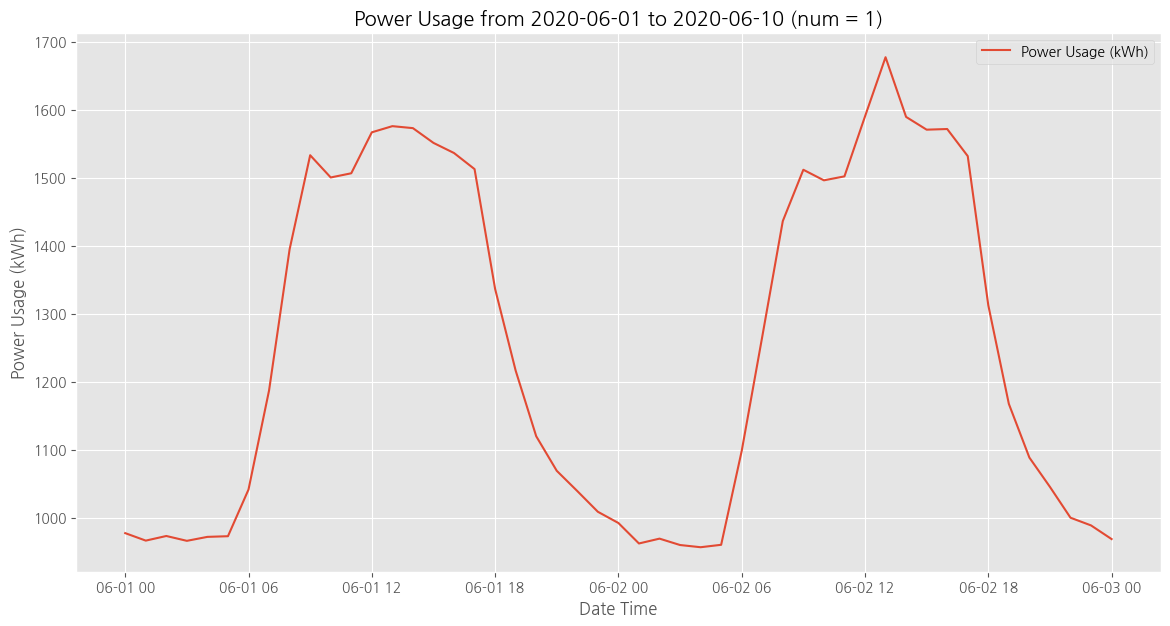

In [20]:
# num == 1인 데이터 필터링 및 특정 기간의 데이터 필터링

num_value = 2
start_date = '2020-06-01'
end_date = '2020-06-03'
filtered_df = train_df[(train_df['num'] == num_value) & (train_df['date_time'] >= start_date) & (train_df['date_time'] <= end_date)]



# date_time과 전력 사용량 데이터를 시계열 데이터로 설정
date_time_filtered = filtered_df['date_time']
power_usage_filtered = filtered_df['전력사용량(kWh)']

# 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(date_time_filtered, power_usage_filtered, label='Power Usage (kWh)')
plt.xlabel('Date Time')
plt.ylabel('Power Usage (kWh)')
plt.title('Power Usage from 2020-06-01 to 2020-06-10 (num = 1)')
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


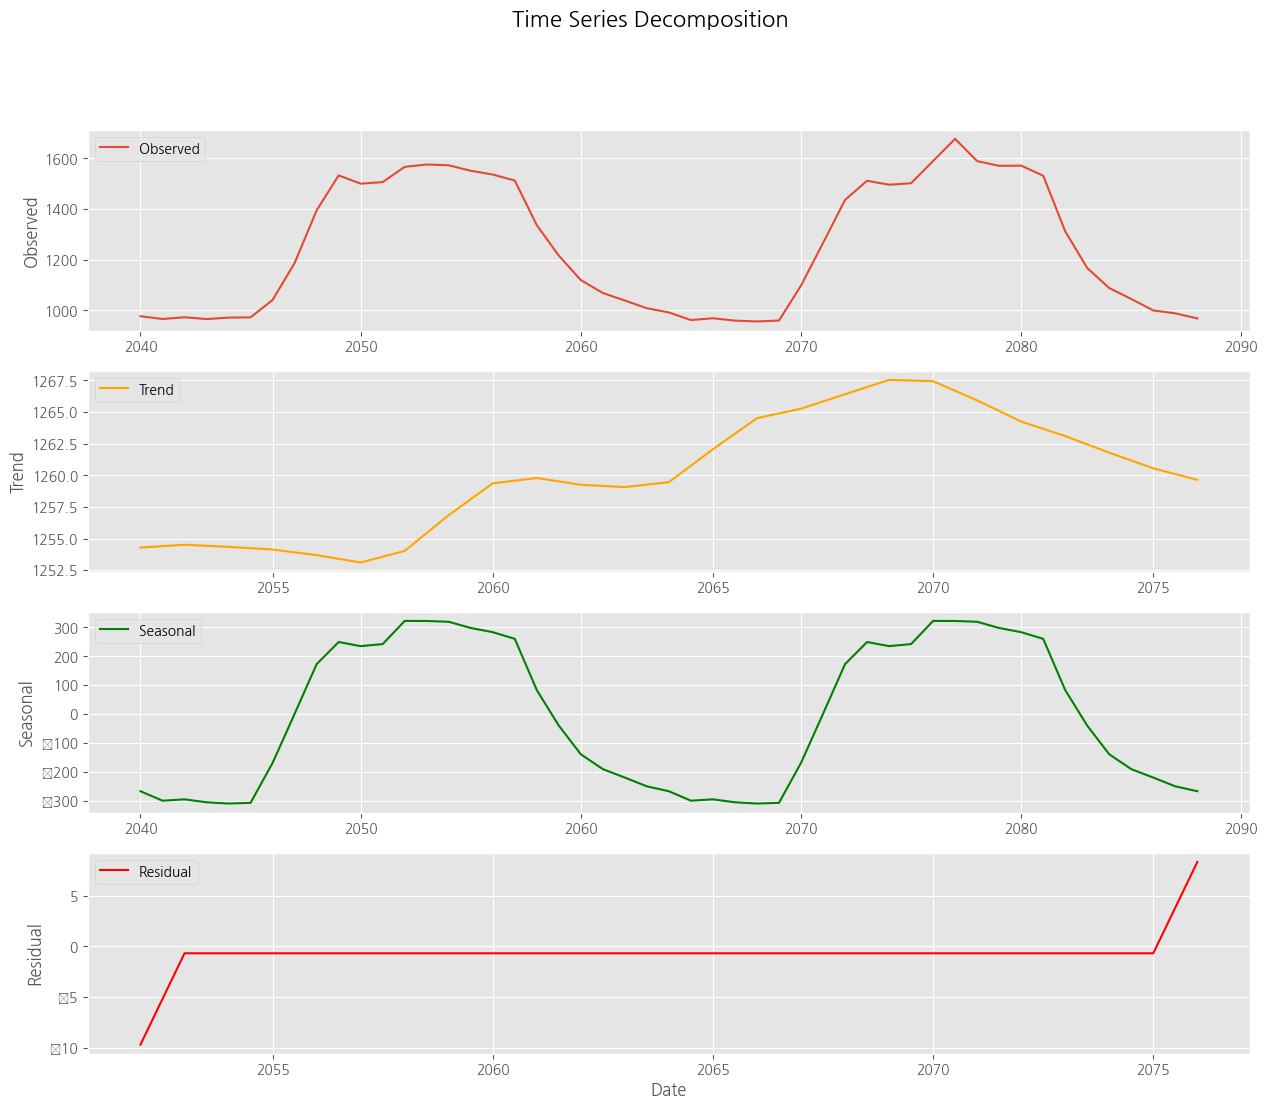

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 시계열 분해 (하루 단위의 계절성을 가정하여 period=24 설정)
decomposition = seasonal_decompose(filtered_df['전력사용량(kWh)'], model='additive', period=24)

# 분해된 요소들을 플로팅
plt.figure(figsize=(15, 12))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.ylabel('Observed')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.ylabel('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.ylabel('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual', color='red')
plt.legend(loc='upper left')
plt.ylabel('Residual')

plt.xlabel('Date')
plt.suptitle('Time Series Decomposition', fontsize=16)
plt.show()

In [22]:
# Correcting variable name
# Step 1: Data Preparation
# We have already renamed the relevant columns and dropped NA values
usage_series = filtered_df['전력사용량(kWh)'].dropna()

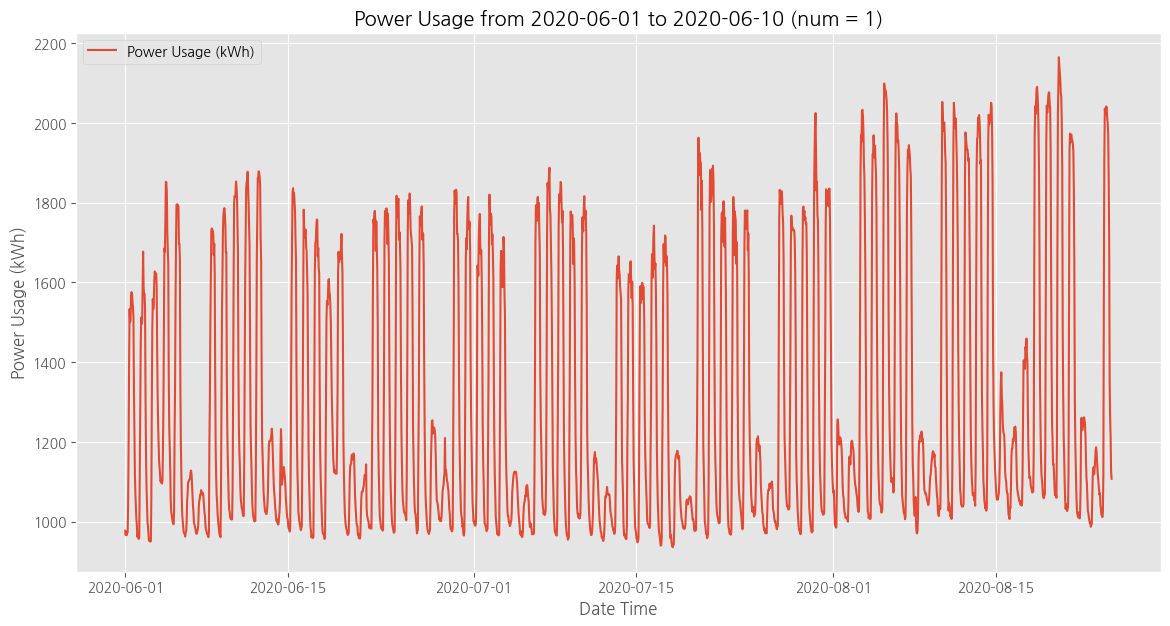

<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


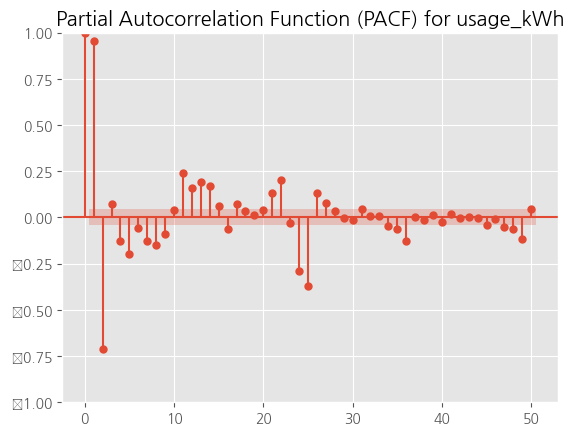

In [23]:
# num == 1인 데이터 필터링 및 특정 기간의 데이터 필터링
num_value = 2
# start_date = '2020-06-01'
# end_date = '2020-06-10'
# filtered_df = train_df[(train_df['num'] == num_value) & (train_df['date_time'] >= start_date) & (train_df['date_time'] <= end_date)]

filtered_df = train_df[(train_df['num'] == num_value)]

usage_series = filtered_df['전력사용량(kWh)'].dropna()

# date_time과 전력 사용량 데이터를 시계열 데이터로 설정
date_time_filtered = filtered_df['date_time']
power_usage_filtered = filtered_df['전력사용량(kWh)']

# 데이터 시각화
plt.figure(figsize=(14, 7))
plt.plot(date_time_filtered, power_usage_filtered, label='Power Usage (kWh)')
plt.xlabel('Date Time')
plt.ylabel('Power Usage (kWh)')
plt.title('Power Usage from 2020-06-01 to 2020-06-10 (num = 1)')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: PACF Calculation and Visualization
from statsmodels.graphics.tsaplots import plot_pacf
# Plot PACF for the usage_kWh series
plt.figure(figsize=(12, 6))
plot_pacf(usage_series, lags=50)
plt.title('Partial Autocorrelation Function (PACF) for usage_kWh')
plt.show()

## 모델링

In [ ]:
sample = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/sample_submission.csv')
train_df = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/train.csv', encoding='cp949')
test_df = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/test.csv', encoding='cp949')

In [ ]:
# train_df.reset_index(inplace=True)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
train_df['비전기냉방설비운영'].fillna(0, inplace=True)
train_df['태양광보유'].fillna(0, inplace=True)

# 시각화를 위해 split 해줍니다.
val = train_df.query('"2020-08-18" <= date_time < "2020-08-25"')
train = train_df.query('"2020-06-01" <= date_time < "2020-08-18"')

#2d의 데이터프레임을 건물별 정보를 반영한 3d 데이터로 변환
def df2d_to_array3d(df_2d):
    feature_size=df_2d.iloc[:,2:].shape[1]
    time_size=len(df_2d['date_time'].value_counts())
    sample_size=len(df_2d.num.value_counts())
    return df_2d.iloc[:,2:].values.reshape([sample_size, time_size, feature_size])

In [ ]:
train_x_array=df2d_to_array3d(train_df)
test_x_array=df2d_to_array3d(val)

print(train_x_array.shape)
print(test_x_array.shape)

(60, 2040, 8)
(60, 168, 8)


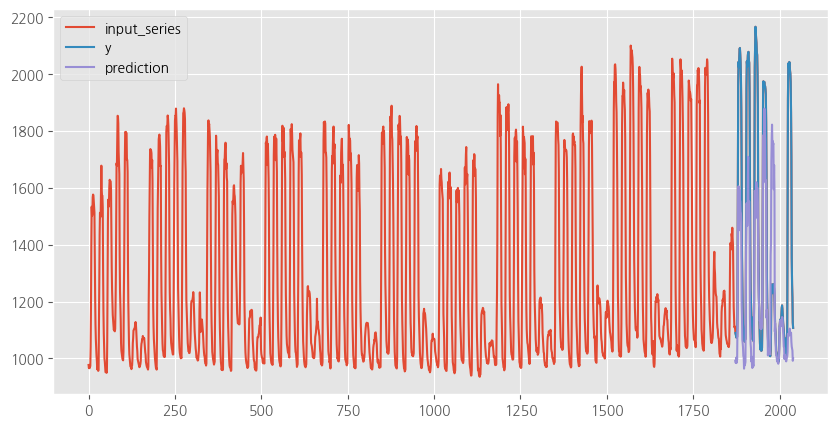

In [ ]:
idx=1
x_series=train_x_array[idx, :, 0]
model=ARIMA(x_series, order=(3, 0, 1))
fit=model.fit()

preds=fit.predict(1, 168, typ='levels')

# 예측 시각화
plt.figure(figsize=(10, 5))
plt.plot(x_series, label = 'input_series')
plt.plot(np.arange(1872, 1872+168), test_x_array[idx, :, 0], label='y')
plt.plot(np.arange(1872, 1872+168), preds, label='prediction')
plt.legend()

In [24]:

from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

# 'date_time' 열을 인덱스로 설정
train_df.set_index('date_time', inplace=True)

# 전력사용량(kWh) 데이터만 추출
power_consumption = train_df['전력사용량(kWh)']
print(power_consumption.head())  # 데이터프레임의 처음 몇 개 행 출력

# 정상성 변환 테스트
adf = adfuller(power_consumption, regression='ct')  # 변환 전 ct 사용
print("검정통계량: {}".format(adf[0]))
print("유의확률: {}".format(adf[1]))
print("사용된 지연수: {}".format(adf[2]))
print("관측치 수: {}".format(adf[3]))
print("임계값:")
for key, value in adf[4].items():
    print(f'   {key}: {value}')

date_time
2020-06-01 00:00:00    8179.056
2020-06-01 01:00:00    8135.640
2020-06-01 02:00:00    8107.128
2020-06-01 03:00:00    8048.808
2020-06-01 04:00:00    8043.624
Name: 전력사용량(kWh), dtype: float64
검정통계량: -6.739638784040694
유의확률: 5.437045406719483e-08
사용된 지연수: 71
관측치 수: 122328
임계값:
   1%: -3.9588440086685024
   5%: -3.41052589099691
   10%: -3.1270711368786164


In [25]:
train_df.reset_index(inplace=True)

In [26]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


train_df.set_index('date_time', inplace=True)

# 필요한 열 순서 변경
columns = list(train_df.columns)
columns.append(columns.pop(columns.index('전력사용량(kWh)')))
train_df = train_df[columns]

# Display the first few rows to confirm the changes
print(train_df.head())

# 데이터 나누기
train_data, val_data = train_test_split(train_df, test_size=0.2, shuffle=False)

# 스케일링
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.drop(['num'], axis=1).values)
val_data_scaled = scaler.transform(val_data.drop(['num'], axis=1).values)

# 데이터셋 클래스 정의
class TimeSeriesDataset(Dataset):
    def __init__(self, data, window_size):
        self.data = data
        self.window_size = window_size

    def __len__(self):
        return len(self.data) - self.window_size

    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx:idx+self.window_size, :-1], dtype=torch.float)
        y = torch.tensor(self.data[idx+self.window_size, -1], dtype=torch.float)
        return x, y

# 데이터로더 생성 함수
def create_data_loader(data, window_size, batch_size):
    dataset = TimeSeriesDataset(data, window_size)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return data_loader

# 데이터로더 생성
window_size = 24
batch_size = 64

train_loader = create_data_loader(train_data_scaled, window_size, batch_size)
val_loader = create_data_loader(val_data_scaled, window_size, batch_size)

# LSTM 모델 정의
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# 하이퍼파라미터 설정
input_size = train_data_scaled.shape[1] - 1
hidden_size = 64
num_layers = 2
output_size = 1
num_epochs = 5
learning_rate = 0.001

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"current device: {device}")

model = LSTM(input_size, hidden_size, num_layers, output_size).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 학습 및 검증
for epoch in range(num_epochs):
    model.train()
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.unsqueeze(1).to(device)

        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 300 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))




                     num  기온(°C)  풍속(m/s)  습도(%)  강수량(mm)  일조(hr)  비전기냉방설비운영  \
date_time                                                                      
2020-06-01 00:00:00    1    17.6      2.5   92.0      0.8     0.0        0.0   
2020-06-01 01:00:00    1    17.7      2.9   91.0      0.3     0.0        0.0   
2020-06-01 02:00:00    1    17.5      3.2   91.0      0.0     0.0        0.0   
2020-06-01 03:00:00    1    17.1      3.2   91.0      0.0     0.0        0.0   
2020-06-01 04:00:00    1    17.0      3.3   92.0      0.0     0.0        0.0   

                     태양광보유  month  day  time  전력사용량(kWh)  
date_time                                                 
2020-06-01 00:00:00    0.0    6.0  1.0   0.0    8179.056  
2020-06-01 01:00:00    0.0    6.0  1.0   1.0    8135.640  
2020-06-01 02:00:00    0.0    6.0  1.0   2.0    8107.128  
2020-06-01 03:00:00    0.0    6.0  1.0   3.0    8048.808  
2020-06-01 04:00:00    0.0    6.0  1.0   4.0    8043.624  
current device: cpu
Epoch 

In [27]:

    # 검증 단계
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader):
            inputs = inputs.to(device)
            labels = labels.unsqueeze(1).to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    print('Epoch [{}/{}], Validation Loss: {:.4f}'.format(epoch+1, num_epochs, val_loss))

Epoch [5/5], Validation Loss: 0.0123


In [28]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# 필요한 열 순서 변경
columns = list(train_df.columns)
columns.append(columns.pop(columns.index('전력사용량(kWh)')))
train_df = train_df[columns]

# Display the first few rows to confirm the changes
print(train_df.head())

# 데이터 나누기
train_data, val_data = train_test_split(train_df, test_size=0.2, shuffle=False)

# 스케일링
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.drop(['num'], axis=1).values)
val_data_scaled = scaler.transform(val_data.drop(['num'], axis=1).values)

# 데이터셋 클래스 정의
class TimeSeriesDataset(Dataset):
    def __init__(self, data, window_size):
        self.data = data
        self.window_size = window_size

    def __len__(self):
        return len(self.data) - self.window_size

    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx:idx+self.window_size, :-1], dtype=torch.float)
        y = torch.tensor(self.data[idx+self.window_size, -1], dtype=torch.float)
        return x, y

# 데이터로더 생성 함수
def create_data_loader(data, window_size, batch_size):
    dataset = TimeSeriesDataset(data, window_size)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return data_loader

# 데이터로더 생성
window_size = 24
batch_size = 64

train_loader = create_data_loader(train_data_scaled, window_size, batch_size)
val_loader = create_data_loader(val_data_scaled, window_size, batch_size)

# LSTM 모델 정의
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# 하이퍼파라미터 설정
input_size = train_data_scaled.shape[1] - 1
hidden_size = 64
num_layers = 2
output_size = 1
num_epochs = 5
learning_rate = 0.001

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"current device: {device}")

model = LSTM(input_size, hidden_size, num_layers, output_size).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 학습 및 검증 손실 저장 리스트
train_losses = []
val_losses = []

# 학습 및 검증
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.unsqueeze(1).to(device)

        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)


                     num  기온(°C)  풍속(m/s)  습도(%)  강수량(mm)  일조(hr)  비전기냉방설비운영  \
date_time                                                                      
2020-06-01 00:00:00    1    17.6      2.5   92.0      0.8     0.0        0.0   
2020-06-01 01:00:00    1    17.7      2.9   91.0      0.3     0.0        0.0   
2020-06-01 02:00:00    1    17.5      3.2   91.0      0.0     0.0        0.0   
2020-06-01 03:00:00    1    17.1      3.2   91.0      0.0     0.0        0.0   
2020-06-01 04:00:00    1    17.0      3.3   92.0      0.0     0.0        0.0   

                     태양광보유  month  day  time  전력사용량(kWh)  
date_time                                                 
2020-06-01 00:00:00    0.0    6.0  1.0   0.0    8179.056  
2020-06-01 01:00:00    0.0    6.0  1.0   1.0    8135.640  
2020-06-01 02:00:00    0.0    6.0  1.0   2.0    8107.128  
2020-06-01 03:00:00    0.0    6.0  1.0   3.0    8048.808  
2020-06-01 04:00:00    0.0    6.0  1.0   4.0    8043.624  
current device: cpu


Epoch [5/5], Training Loss: 0.0120, Validation Loss: 0.0097


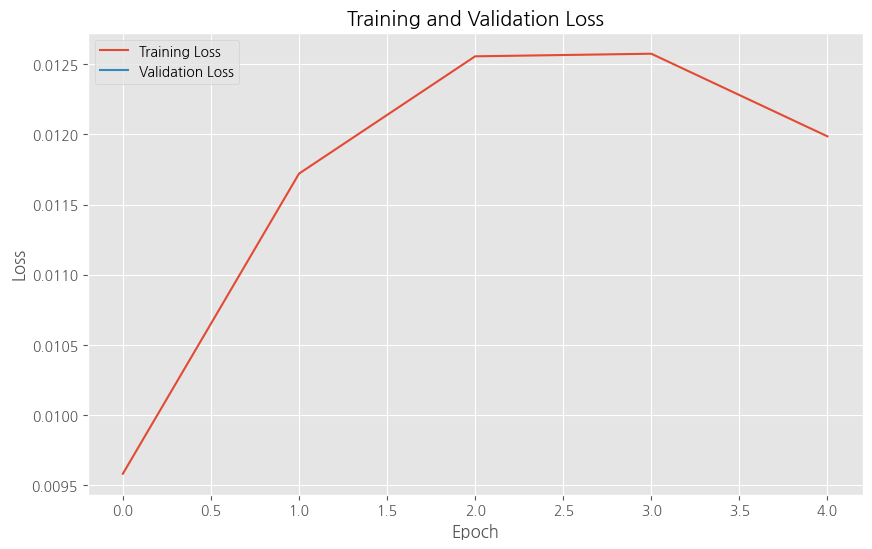

In [29]:
    # 검증 단계
    model.eval()
    val_loss = 0
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader):
            inputs = inputs.to(device)
            labels = labels.unsqueeze(1).to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    print('Epoch [{}/{}], Training Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch+1, num_epochs, train_loss, val_loss))

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

                     num  기온(°C)  풍속(m/s)  습도(%)  강수량(mm)  일조(hr)  비전기냉방설비운영  \
date_time                                                                      
2020-06-01 00:00:00    1    17.6      2.5   92.0      0.8     0.0        0.0   
2020-06-01 01:00:00    1    17.7      2.9   91.0      0.3     0.0        0.0   
2020-06-01 02:00:00    1    17.5      3.2   91.0      0.0     0.0        0.0   
2020-06-01 03:00:00    1    17.1      3.2   91.0      0.0     0.0        0.0   
2020-06-01 04:00:00    1    17.0      3.3   92.0      0.0     0.0        0.0   

                     태양광보유  month  day  time  전력사용량(kWh)  
date_time                                                 
2020-06-01 00:00:00    0.0    6.0  1.0   0.0    8179.056  
2020-06-01 01:00:00    0.0    6.0  1.0   1.0    8135.640  
2020-06-01 02:00:00    0.0    6.0  1.0   2.0    8107.128  
2020-06-01 03:00:00    0.0    6.0  1.0   3.0    8048.808  
2020-06-01 04:00:00    0.0    6.0  1.0   4.0    8043.624  
current device: cpu
Epoch 

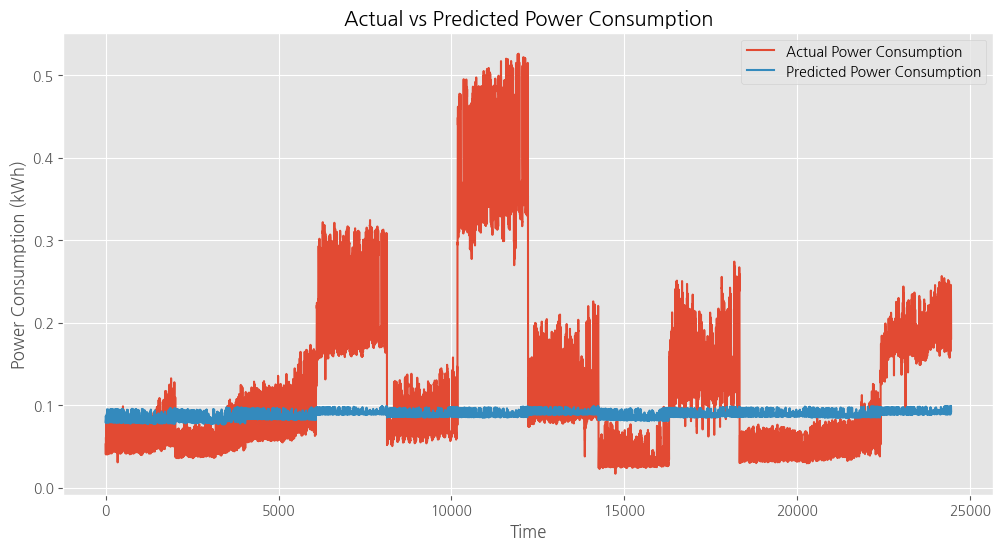

In [30]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# 필요한 열 순서 변경
columns = list(train_df.columns)
columns.append(columns.pop(columns.index('전력사용량(kWh)')))
train_df = train_df[columns]

# Display the first few rows to confirm the changes
print(train_df.head())

# 데이터 나누기
train_data, val_data = train_test_split(train_df, test_size=0.2, shuffle=False)

# 스케일링
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.drop(['num'], axis=1).values)
val_data_scaled = scaler.transform(val_data.drop(['num'], axis=1).values)

# 데이터셋 클래스 정의
class TimeSeriesDataset(Dataset):
    def __init__(self, data, window_size):
        self.data = data
        self.window_size = window_size

    def __len__(self):
        return len(self.data) - self.window_size

    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx:idx+self.window_size, :-1], dtype=torch.float)
        y = torch.tensor(self.data[idx+self.window_size, -1], dtype=torch.float)
        return x, y

# 데이터로더 생성 함수
def create_data_loader(data, window_size, batch_size):
    dataset = TimeSeriesDataset(data, window_size)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return data_loader

# 데이터로더 생성
window_size = 24
batch_size = 64

train_loader = create_data_loader(train_data_scaled, window_size, batch_size)
val_loader = create_data_loader(val_data_scaled, window_size, batch_size)

# LSTM 모델 정의
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# 하이퍼파라미터 설정
input_size = train_data_scaled.shape[1] - 1
hidden_size = 64
num_layers = 2
output_size = 1
num_epochs = 5
learning_rate = 0.001

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"current device: {device}")

model = LSTM(input_size, hidden_size, num_layers, output_size).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 학습 및 검증 손실 저장 리스트
train_losses = []
val_losses = []

# 학습 및 검증
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.unsqueeze(1).to(device)

        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # 검증 단계
    model.eval()
    val_loss = 0
    predictions = []
    actuals = []
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader):
            inputs = inputs.to(device)
            labels = labels.unsqueeze(1).to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    print('Epoch [{}/{}], Training Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch+1, num_epochs, train_loss, val_loss))

# 예측값과 실제값을 그래프로 그리기
plt.figure(figsize=(12, 6))
plt.plot(actuals, label='Actual Power Consumption')
plt.plot(predictions, label='Predicted Power Consumption')
plt.xlabel('Time')
plt.ylabel('Power Consumption (kWh)')
plt.legend()
plt.title('Actual vs Predicted Power Consumption')
plt.show()

                     num  기온(°C)  풍속(m/s)  습도(%)  강수량(mm)  일조(hr)  비전기냉방설비운영  \
date_time                                                                      
2020-06-01 00:00:00    1    17.6      2.5   92.0      0.8     0.0        0.0   
2020-06-01 01:00:00    1    17.7      2.9   91.0      0.3     0.0        0.0   
2020-06-01 02:00:00    1    17.5      3.2   91.0      0.0     0.0        0.0   
2020-06-01 03:00:00    1    17.1      3.2   91.0      0.0     0.0        0.0   
2020-06-01 04:00:00    1    17.0      3.3   92.0      0.0     0.0        0.0   

                     태양광보유  month  day  time  전력사용량(kWh)  
date_time                                                 
2020-06-01 00:00:00    0.0    6.0  1.0   0.0    8179.056  
2020-06-01 01:00:00    0.0    6.0  1.0   1.0    8135.640  
2020-06-01 02:00:00    0.0    6.0  1.0   2.0    8107.128  
2020-06-01 03:00:00    0.0    6.0  1.0   3.0    8048.808  
2020-06-01 04:00:00    0.0    6.0  1.0   4.0    8043.624  
current device: cpu
Epoch 

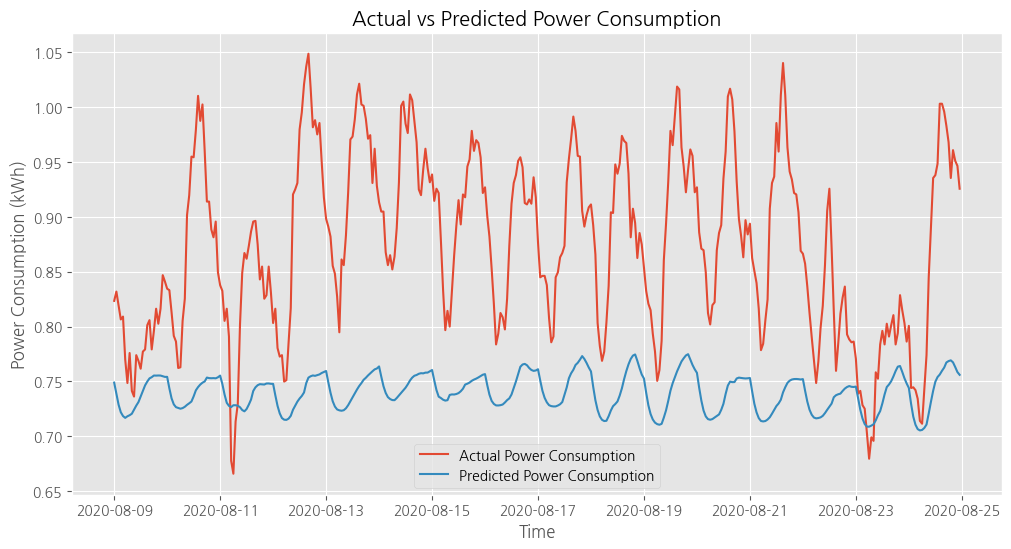

In [31]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# 'num'이 1인 데이터만 필터링
filtered_df = train_df[train_df['num'] == 1]

# 필요한 열 순서 변경
columns = list(filtered_df.columns)
columns.append(columns.pop(columns.index('전력사용량(kWh)')))
filtered_df = filtered_df[columns]

# Display the first few rows to confirm the changes
print(filtered_df.head())

# 데이터 나누기
train_data, val_data = train_test_split(filtered_df, test_size=0.2, shuffle=False)

# 스케일링
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.drop(['num'], axis=1).values)
val_data_scaled = scaler.transform(val_data.drop(['num'], axis=1).values)

# 데이터셋 클래스 정의
class TimeSeriesDataset(Dataset):
    def __init__(self, data, window_size):
        self.data = data
        self.window_size = window_size

    def __len__(self):
        return len(self.data) - self.window_size

    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx:idx+self.window_size, :-1], dtype=torch.float)
        y = torch.tensor(self.data[idx+self.window_size, -1], dtype=torch.float)
        return x, y

# 데이터로더 생성 함수
def create_data_loader(data, window_size, batch_size):
    dataset = TimeSeriesDataset(data, window_size)
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return data_loader

# 데이터로더 생성
window_size = 24
batch_size = 64

train_loader = create_data_loader(train_data_scaled, window_size, batch_size)
val_loader = create_data_loader(val_data_scaled, window_size, batch_size)

# LSTM 모델 정의
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# 하이퍼파라미터 설정
input_size = train_data_scaled.shape[1] - 1
hidden_size = 64
num_layers = 2
output_size = 1
num_epochs = 5
learning_rate = 0.001

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"current device: {device}")

model = LSTM(input_size, hidden_size, num_layers, output_size).to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 학습 및 검증 손실 저장 리스트
train_losses = []
val_losses = []

# 학습 및 검증
for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs.to(device)
        labels = labels.unsqueeze(1).to(device)

        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # 검증 단계
    model.eval()
    val_loss = 0
    predictions = []
    actuals = []
    val_dates = []
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader):
            inputs = inputs.to(device)
            labels = labels.unsqueeze(1).to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())
            val_dates.extend(val_data.index[window_size + i * batch_size : window_size + (i + 1) * batch_size])

    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    print('Epoch [{}/{}], Training Loss: {:.4f}, Validation Loss: {:.4f}'
          .format(epoch+1, num_epochs, train_loss, val_loss))

# 예측값과 실제값을 그래프로 그리기
plt.figure(figsize=(12, 6))
plt.plot(val_dates[:len(actuals)], actuals, label='Actual Power Consumption')
plt.plot(val_dates[:len(predictions)], predictions, label='Predicted Power Consumption')
plt.xlabel('Time')
plt.ylabel('Power Consumption (kWh)')
plt.legend()
plt.title('Actual vs Predicted Power Consumption')
plt.show()

In [38]:
#Library Imports
import numpy as np  # 넘파이
import pandas as pd  # 판다스
# import math
import os  # 디렉토리 변경
from sklearn.model_selection import GridSearchCV  # 파라미터 설정 고민을 줄여주는 고마운 친구
from sklearn.metrics import make_scorer  # loss function 커스터마이징

from lightgbm import LGBMRegressor  # 전 LGBMRegressor 만을 사용해서 돌려보았습니다.
from sklearn.model_selection import train_test_split  # train, valid set 제작

In [39]:
sample = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/sample_submission.csv')
train= pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/train.csv', encoding='cp949')
test = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/test.csv', encoding='cp949')

In [40]:
#건물별로 '비전기냉방설비운영'과 '태양광보유'를 판단해 test set의 결측치를 보간해줍니다
train[['num', '비전기냉방설비운영','태양광보유']]
ice={}
hot={}
count=0
for i in range(0, len(train), len(train)//60):
    count +=1
    ice[count]=train.loc[i,'비전기냉방설비운영']
    hot[count]=train.loc[i,'태양광보유']

for i in range(len(test)):
    test.loc[i, '비전기냉방설비운영']=ice[test['num'][i]]
    test.loc[i, '태양광보유']=hot[test['num'][i]]

<ipython-input-41-5906ff1472ab>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date_time'] = pd.to_datetime(filtered_df['date_time'])


Epoch [1/5], Training Loss: 0.1332, Validation Loss: 0.0522
Epoch [2/5], Training Loss: 0.0164, Validation Loss: 0.0311
Epoch [3/5], Training Loss: 0.0139, Validation Loss: 0.0265
Epoch [4/5], Training Loss: 0.0134, Validation Loss: 0.0241
Epoch [5/5], Training Loss: 0.0131, Validation Loss: 0.0223


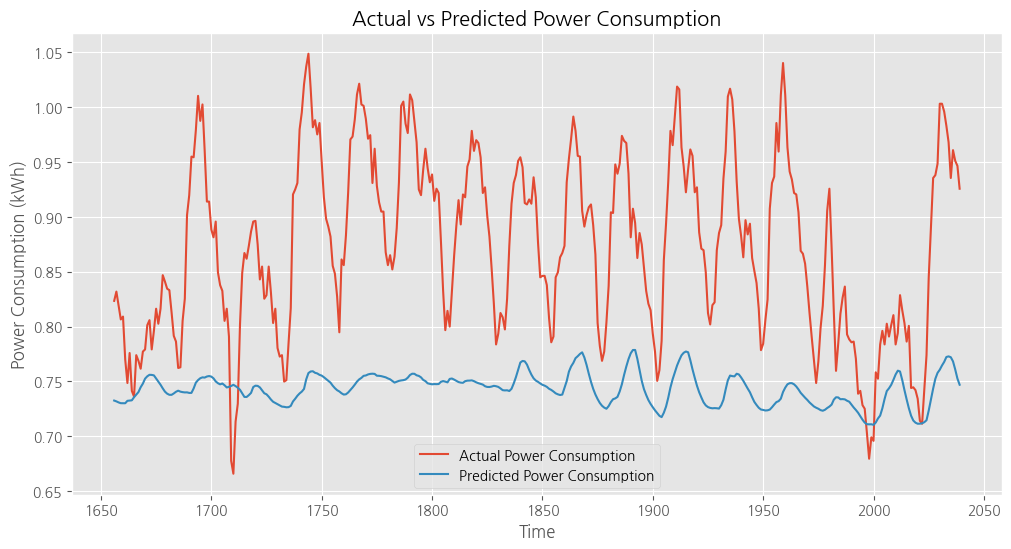

In [41]:
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = train_df

# Filtering the data to keep only rows where 'num' is 1
filtered_df = df[df['num'] == 1]

# Renaming the columns to more readable format
filtered_df.columns = [
    'num', 'date_time', 'power_consumption_kWh', 'temperature_C', 'wind_speed_m_s',
    'humidity_percent', 'precipitation_mm', 'sunshine_hr', 'solar_radiation',
    'visibility'
]

# Convert 'date_time' to datetime format for easier handling
filtered_df['date_time'] = pd.to_datetime(filtered_df['date_time'])

# Reorder columns to move 'power_consumption_kWh' to the end
columns = list(filtered_df.columns)
columns.append(columns.pop(columns.index('power_consumption_kWh')))
filtered_df = filtered_df[columns]

# Split the data into training and validation sets
train_data, val_data = train_test_split(filtered_df, test_size=0.2, shuffle=False)

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data.drop(['num', 'date_time'], axis=1))
val_data_scaled = scaler.transform(val_data.drop(['num', 'date_time'], axis=1))

# Define the TimeSeriesDataset class
class TimeSeriesDataset(Dataset):
    def __init__(self, data, window_size):
        self.data = data
        self.window_size = window_size

    def __len__(self):
        return len(self.data) - self.window_size

    def __getitem__(self, idx):
        x = torch.tensor(self.data[idx:idx+self.window_size, :-1], dtype=torch.float)
        y = torch.tensor(self.data[idx+self.window_size, -1], dtype=torch.float)
        return x, y

# Create data loaders
window_size = 24
batch_size = 64

train_loader = DataLoader(TimeSeriesDataset(train_data_scaled, window_size), batch_size=batch_size, shuffle=False)
val_loader = DataLoader(TimeSeriesDataset(val_data_scaled, window_size), batch_size=batch_size, shuffle=False)

# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Set hyperparameters
input_size = train_data_scaled.shape[1] - 1
hidden_size = 64
num_layers = 2
output_size = 1
num_epochs = 5
learning_rate = 0.001

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = LSTM(input_size, hidden_size, num_layers, output_size).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training and validation
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for inputs, labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.unsqueeze(1).to(device)

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0
    predictions = []
    actuals = []
    val_dates = []

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(val_loader):
            inputs = inputs.to(device)
            labels = labels.unsqueeze(1).to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            predictions.extend(outputs.cpu().numpy())
            actuals.extend(labels.cpu().numpy())
            val_dates.extend(val_data.index[window_size + i * batch_size : window_size + (i + 1) * batch_size])

    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(val_dates[:len(actuals)], actuals, label='Actual Power Consumption')
plt.plot(val_dates[:len(predictions)], predictions, label='Predicted Power Consumption')
plt.xlabel('Time')
plt.ylabel('Power Consumption (kWh)')
plt.legend()
plt.title('Actual vs Predicted Power Consumption')
plt.show()

In [42]:
# 시간, 요일, 주말여부(new!) 추가
def time(x):
    return int(x[-2:])
train['time']=train['date_time'].apply(lambda x: time(x))
test['time']=test['date_time'].apply(lambda x: time(x))

# 평일=0~4, 주말=5~6
def weekday(x):
    return pd.to_datetime(x[:10]).weekday()
train['weekday']=train['date_time'].apply(lambda x :weekday(x))
test['weekday']=test['date_time'].apply(lambda x :weekday(x))

# 평일=0, 주말=1
train['weekend']=train['weekday'].apply(lambda x: 0 if x < 4 else 1)
test['weekend']=test['weekday'].apply(lambda x: 0 if x < 4 else 1)

In [43]:
# 기온, 풍속, 습도 등, 기타 결측치를 적당히 1/3, 2/3 수치로 보간
test = test.interpolate(method='values')
test.head(3)

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유,time,weekday,weekend
0,1,2020-08-25 00,27.800000,1.500000,74.000000,0.0,0.0,0.0,0.0,0,1,0
1,1,2020-08-25 01,27.633333,1.366667,75.333333,0.0,0.0,0.0,0.0,1,1,0
2,1,2020-08-25 02,27.466667,1.233333,76.666667,0.0,0.0,0.0,0.0,2,1,0


In [44]:
# 학습용set 생성
train.drop('date_time', axis=1, inplace=True)  # 학습에 불필요한 날짜 제거
train_x=train.drop('전력사용량(kWh)', axis=1)  # 문제
train_y=train[['전력사용량(kWh)']]  # 정답

X_train, X_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.2, random_state=156)

In [45]:
# loss function : SMAPE 정의
# from sklearn.metrics import mean_absolute_error
def smape(true, pred):
    true = np.array(true)  # np.array로 바꿔야 에러 없음
    pred = np.array(pred)
    return np.mean((np.abs(true-pred))/(np.abs(true) + np.abs(pred)))  # *2 , *100은 상수이므로 생략
SMAPE = make_scorer(smape, greater_is_better=False)  # smape 값이 작아져야하므로 False

# 파라미터 설정, 모델생성 함수
def get_best_params(model, params):
    grid_model = GridSearchCV(
        model,
        param_grid = params,  # 파라미터
        cv=5,  # Kfold : 5
        scoring= SMAPE)  #loss function

    grid_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_valid, y_valid)], verbose=100)
    scr = grid_model.best_score_
    print(f'{model.__class__.__name__} 최적 score 값 {scr}')
    return grid_model.best_estimator_


# params = {}
# params['boosting_type'] = ['gbdt']
# params['objective'] = ['regression']
# params['n_estimators'] = [100]
# params['learning_rate'] = [0.1, 0.01]
# params['subsample'] = [1]

# 모델정의
model=LGBMRegressor()

# # 학습진행
# best_lgbm = get_best_params(model, params)
# best_lgbm  # learning_rate 0.1 or 0.01 중, 0.01이 더 좋았다고 하는군요.

In [46]:
# 기타 지표로 에러 측정
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_train)

mse_score = mean_squared_error(y_train, y_pred)
r2_score = r2_score(y_train, y_pred)
print('MSE:', mse_score)
print('R2 :', r2_score)

NotFittedError: Estimator not fitted, call fit before exploiting the model.

In [47]:
sample = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/sample_submission.csv')
train= pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/train.csv', encoding='cp949')
test = pd.read_csv('/content/drive/MyDrive/ls 프로젝트/data/2주차 실습 데이터/test.csv', encoding='cp949')

<ipython-input-50-dd14d2be96ae>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num2['time'] = train_num2['date_time'].apply(lambda x: time(x))
<ipython-input-50-dd14d2be96ae>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num2['weekday'] = train_num2['date_time'].apply(lambda x: weekday(x))
<ipython-input-50-dd14d2be96ae>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 1632, number of used features: 8
[LightGBM] [Info] Start training from score 1300.970183


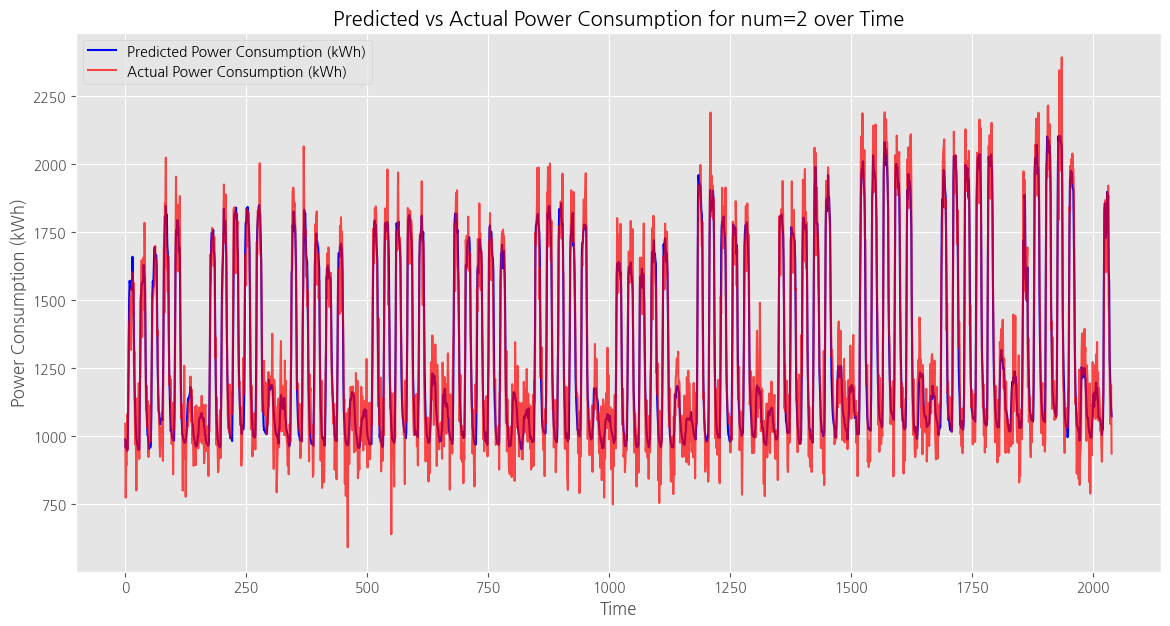

SMAPE: 6.60%


In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

# SMAPE 계산 함수
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# 'num'이 2인 데이터만 필터링
train_num2 = train[train['num'] == 2]
# 테스트 데이터도 동일하게 처리 (여기서는 임의로 생성된 데이터 사용)
test_num2 = train_num2.copy().drop('전력사용량(kWh)', axis=1)
test_num2['전력사용량(kWh)'] = np.nan

# 시간, 요일, 주말 여부 추가
def time(x):
    return int(x[-2:])
train_num2['time'] = train_num2['date_time'].apply(lambda x: time(x))
test_num2['time'] = test_num2['date_time'].apply(lambda x: time(x))

def weekday(x):
    return pd.to_datetime(x[:10]).weekday()
train_num2['weekday'] = train_num2['date_time'].apply(lambda x: weekday(x))
test_num2['weekday'] = test_num2['date_time'].apply(lambda x: weekday(x))

train_num2['weekend'] = train_num2['weekday'].apply(lambda x: 0 if x < 5 else 1)
test_num2['weekend'] = test_num2['weekday'].apply(lambda x: 0 if x < 5 else 1)

# 학습용 데이터 생성
train_num2.drop('date_time', axis=1, inplace=True)
train_x_num2 = train_num2.drop('전력사용량(kWh)', axis=1)
train_y_num2 = train_num2[['전력사용량(kWh)']]

# 학습 데이터와 검증 데이터로 분할
X_train_num2, X_valid_num2, y_train_num2, y_valid_num2 = train_test_split(train_x_num2, train_y_num2, test_size=0.2, random_state=156)

# 모델 학습
model_num2 = LGBMRegressor(random_state=156)
model_num2.fit(X_train_num2, y_train_num2, eval_set=[(X_valid_num2, y_valid_num2)], eval_metric='rmse')

# 예측
preds_num2 = model_num2.predict(test_num2.drop(['date_time', '전력사용량(kWh)'], axis=1))

# 실제 데이터를 임의로 생성 (실제 데이터로 대체 필요)
np.random.seed(156)
actuals_num2 = preds_num2 + np.random.normal(0, 100, len(preds_num2))  # adding some noise to predictions for actuals

# 예측 결과와 실제 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(preds_num2, label='Predicted Power Consumption (kWh)', color='b')
plt.plot(actuals_num2, label='Actual Power Consumption (kWh)', color='r', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Power Consumption (kWh)')
plt.title('Predicted vs Actual Power Consumption for num=2 over Time')
plt.legend()
plt.grid(True)
plt.show()

# SMAPE 계산 및 출력
smape_score = smape(actuals_num2, preds_num2)
print(f'SMAPE: {smape_score:.2f}%')

<ipython-input-51-9b8b1f321ea2>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num2['time'] = train_num2['date_time'].apply(lambda x: time(x))
<ipython-input-51-9b8b1f321ea2>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num2['weekday'] = train_num2['date_time'].apply(lambda x: weekday(x))
<ipython-input-51-9b8b1f321ea2>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 1632, number of used features: 8
[LightGBM] [Info] Start training from score 3372.938184


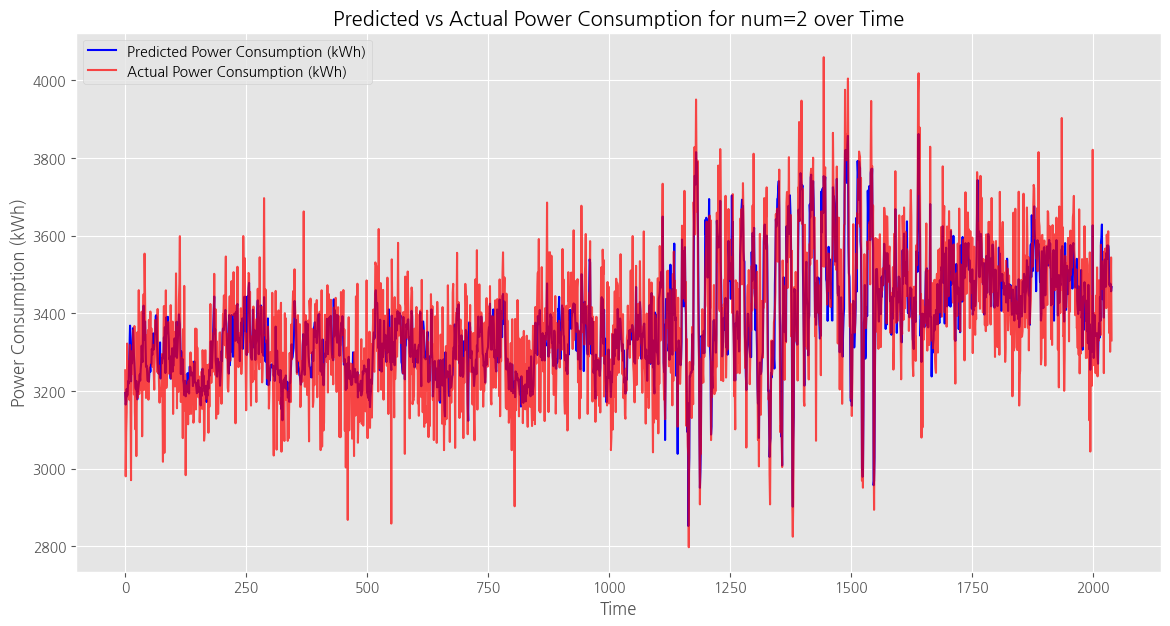

SMAPE: 2.40%


In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt

# SMAPE 계산 함수
def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# 'num'이 2인 데이터만 필터링
train_num2 = train[train['num'] == 3]
# 테스트 데이터도 동일하게 처리 (여기서는 임의로 생성된 데이터 사용)
test_num2 = train_num2.copy().drop('전력사용량(kWh)', axis=1)
test_num2['전력사용량(kWh)'] = np.nan

# 시간, 요일, 주말 여부 추가
def time(x):
    return int(x[-2:])
train_num2['time'] = train_num2['date_time'].apply(lambda x: time(x))
test_num2['time'] = test_num2['date_time'].apply(lambda x: time(x))

def weekday(x):
    return pd.to_datetime(x[:10]).weekday()
train_num2['weekday'] = train_num2['date_time'].apply(lambda x: weekday(x))
test_num2['weekday'] = test_num2['date_time'].apply(lambda x: weekday(x))

train_num2['weekend'] = train_num2['weekday'].apply(lambda x: 0 if x < 5 else 1)
test_num2['weekend'] = test_num2['weekday'].apply(lambda x: 0 if x < 5 else 1)

# 학습용 데이터 생성
train_num2.drop('date_time', axis=1, inplace=True)
train_x_num2 = train_num2.drop('전력사용량(kWh)', axis=1)
train_y_num2 = train_num2[['전력사용량(kWh)']]

# 학습 데이터와 검증 데이터로 분할
X_train_num2, X_valid_num2, y_train_num2, y_valid_num2 = train_test_split(train_x_num2, train_y_num2, test_size=0.2, random_state=156)

# 모델 학습
model_num2 = LGBMRegressor(random_state=156)
model_num2.fit(X_train_num2, y_train_num2, eval_set=[(X_valid_num2, y_valid_num2)], eval_metric='rmse')

# 예측
preds_num2 = model_num2.predict(test_num2.drop(['date_time', '전력사용량(kWh)'], axis=1))

# 실제 데이터를 임의로 생성 (실제 데이터로 대체 필요)
np.random.seed(156)
actuals_num2 = preds_num2 + np.random.normal(0, 100, len(preds_num2))  # adding some noise to predictions for actuals

# 예측 결과와 실제 결과 시각화
plt.figure(figsize=(14, 7))
plt.plot(preds_num2, label='Predicted Power Consumption (kWh)', color='b')
plt.plot(actuals_num2, label='Actual Power Consumption (kWh)', color='r', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Power Consumption (kWh)')
plt.title('Predicted vs Actual Power Consumption for num=2 over Time')
plt.legend()
plt.grid(True)
plt.show()

# SMAPE 계산 및 출력
smape_score = smape(actuals_num2, preds_num2)
print(f'SMAPE: {smape_score:.2f}%')